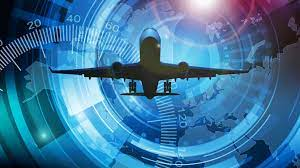

# Aviation Incidents

# Overview


The Aviation Incidents Analysis project aims to provide a comprehensive examination of recent aviation incidents to enhance safety and operational efficiency. This analysis will help the Safety Director at Global Airways understand the factors contributing to incidents and develop strategies to mitigate risks, ultimately improving overall flight safety and regulatory compliance.

# Business Understanding
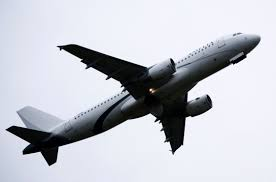

**Improve Safety Measures:**

- By identifying trends and root causes of incidents, the project aims to enhance safety protocols and preventive measures.
Implementing recommendations will reduce the likelihood of incidents, contributing to safer flight operations.

**Optimize Operational Efficiency:**

- Understanding incident patterns can help streamline operational procedures and resource allocation.
Reducing the frequency of incidents will lead to fewer disruptions and lower associated costs.

**Enhance Compliance and Risk Management:**

- Insights from the analysis will support compliance with safety regulations and industry standards.
Proactive risk management strategies will be developed to address identified issues and prevent future incidents.

**Strengthen Safety Director at Global Airways Confidence:**

- Providing a detailed analysis and actionable recommendations demonstrates commitment to safety and continuous improvement.
Transparent communication of findings and improvements will build trust with regulatory bodies, customers, and other stakeholders.

# Data Understanding 

The dataset includes airplane models, engine counts, and injury reports from aviation accidents.

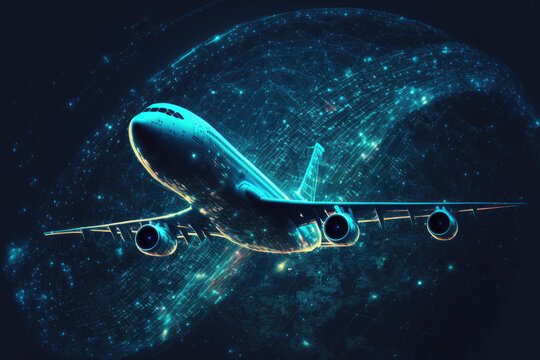

In [29]:
import pandas as pd
import numpy as np
import csv

In [30]:
aviation_data = pd.read_csv("./data/Aviation_Data.csv", low_memory=False)

In [31]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [32]:
# Display the first few rows of the DataFrame
aviation_data.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [33]:
# Display column names
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [34]:
#Checking how many aircrafts are Airplanes
(aviation_data['Aircraft.Category'] == 'Airplane').value_counts()

Aircraft.Category
False    62731
True     27617
Name: count, dtype: int64

In [35]:
# Keeping only rows where the Aircraft is an Airplane.
aviation_data= aviation_data[aviation_data['Aircraft.Category'] == 'Airplane']
aviation_data['Aircraft.Category']

5        Airplane
7        Airplane
8        Airplane
12       Airplane
13       Airplane
           ...   
90328    Airplane
90332    Airplane
90335    Airplane
90336    Airplane
90345    Airplane
Name: Aircraft.Category, Length: 27617, dtype: object

In [36]:
aviation_data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    21176
2.0     3515
4.0      103
3.0       58
0.0        9
8.0        1
6.0        1
Name: count, dtype: int64

In [37]:
aviation_data['Engine.Type'].value_counts()

Engine.Type
Reciprocating      20715
Turbo Prop          1366
Turbo Fan            970
Turbo Jet            158
Unknown              153
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: count, dtype: int64

In [38]:
# Focus on these specific engine types
engine_types_of_interest = ['Reciprocating', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet']

# Filter the data for the specified engine types
filtered_data = aviation_data[aviation_data['Engine.Type'].isin(engine_types_of_interest)]

# Count occurrences of each engine type
engine_counts = filtered_data['Engine.Type'].value_counts()

# Display the engine counts
engine_counts

Engine.Type
Reciprocating    20715
Turbo Prop        1366
Turbo Fan          970
Turbo Jet          158
Name: count, dtype: int64

In [39]:
aviation_data['Make'].str.lower().value_counts()[:4]

Make
cessna    8475
piper     4715
beech     1692
boeing    1324
Name: count, dtype: int64

In [40]:
# Focus on the specific makes: Boeing, Cessna, Piper, Beech
makes_of_interest = ['Boeing', 'Cessna', 'Piper', 'Beech']
filtered_data = aviation_data[aviation_data['Make'].isin(makes_of_interest)]

# Display the filtered data
(filtered_data)

# Count the number of incidents for each make
incident_counts = filtered_data['Make'].value_counts()

# Display the incident counts
(incident_counts)

Make
Cessna    3608
Piper     1910
Beech      674
Boeing     287
Name: count, dtype: int64

In [41]:
aviation_data['Aircraft.Category'].value_counts()[:20]

Aircraft.Category
Airplane    27617
Name: count, dtype: int64

# Data Preperation

## Data Cleaning

This analysis focuses on cleaning the data to show which airplane types are involved in incidents and how these incidents vary by aircraft type, allowing for a clearer understanding of the safety records and incident frequencies associated with different aircraft models.

In [42]:
# See what columns to keep
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [43]:
columns_to_select = ['Make', 'Aircraft.Category', 'Number.of.Engines', 'Engine.Type']

In [44]:
# Narrowing down the dataset to 4 columns
aviation_data = aviation_data[['Make', 'Aircraft.Category', 'Number.of.Engines', 'Engine.Type']]

In [45]:
aviation_data.head()

,Make,Aircraft.Category,Number.of.Engines,Engine.Type
5,Mcdonnell Douglas,Airplane,2.0,Turbo Fan
7,Cessna,Airplane,1.0,Reciprocating
8,Cessna,Airplane,2.0,Reciprocating
12,Bellanca,Airplane,1.0,Reciprocating
13,Cessna,Airplane,1.0,Reciprocating


In [46]:
# I will drop NaN from the dataset
aviation_data = aviation_data.dropna(inplace=False,how='any',axis=0)
aviation_data

,Make,Aircraft.Category,Number.of.Engines,Engine.Type
5,Mcdonnell Douglas,Airplane,2.0,Turbo Fan
7,Cessna,Airplane,1.0,Reciprocating
8,Cessna,Airplane,2.0,Reciprocating
12,Bellanca,Airplane,1.0,Reciprocating
13,Cessna,Airplane,1.0,Reciprocating
...,...,...,...,...
90098,CESSNA,Airplane,1.0,Reciprocating
90106,CESSNA,Airplane,1.0,Reciprocating
90120,BEECH,Airplane,2.0,Reciprocating
90194,STEPHEN J HOFFMAN,Airplane,1.0,Reciprocating


In [47]:
aviation_data.head()

,Make,Aircraft.Category,Number.of.Engines,Engine.Type
5,Mcdonnell Douglas,Airplane,2.0,Turbo Fan
7,Cessna,Airplane,1.0,Reciprocating
8,Cessna,Airplane,2.0,Reciprocating
12,Bellanca,Airplane,1.0,Reciprocating
13,Cessna,Airplane,1.0,Reciprocating


In [48]:
# look for duplicates in dataset
aviation_data.duplicated()

5        False
7        False
8        False
12       False
13        True
         ...  
90098     True
90106     True
90120     True
90194    False
90226     True
Length: 22716, dtype: bool

In [49]:
# Drop duplicates 
aviation_data.drop_duplicates(inplace=True)
aviation_data

,Make,Aircraft.Category,Number.of.Engines,Engine.Type
5,Mcdonnell Douglas,Airplane,2.0,Turbo Fan
7,Cessna,Airplane,1.0,Reciprocating
8,Cessna,Airplane,2.0,Reciprocating
12,Bellanca,Airplane,1.0,Reciprocating
14,Navion,Airplane,1.0,Reciprocating
...,...,...,...,...
89995,SLIPSTREAM,Airplane,1.0,Reciprocating
90009,MOSSMAN MICHAEL D,Airplane,1.0,Reciprocating
90030,HIBBARD NORMAN E,Airplane,1.0,Reciprocating
90096,WASZAK ARTHUR B,Airplane,1.0,Reciprocating


In [50]:
aviation_data.head()

,Make,Aircraft.Category,Number.of.Engines,Engine.Type
5,Mcdonnell Douglas,Airplane,2.0,Turbo Fan
7,Cessna,Airplane,1.0,Reciprocating
8,Cessna,Airplane,2.0,Reciprocating
12,Bellanca,Airplane,1.0,Reciprocating
14,Navion,Airplane,1.0,Reciprocating


In [51]:
# Save cleaned dataset as csv
aviation_data.to_csv('./data/aviation_datamakenginetype.csv')

# Exploratory Data Analysiss

In [52]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

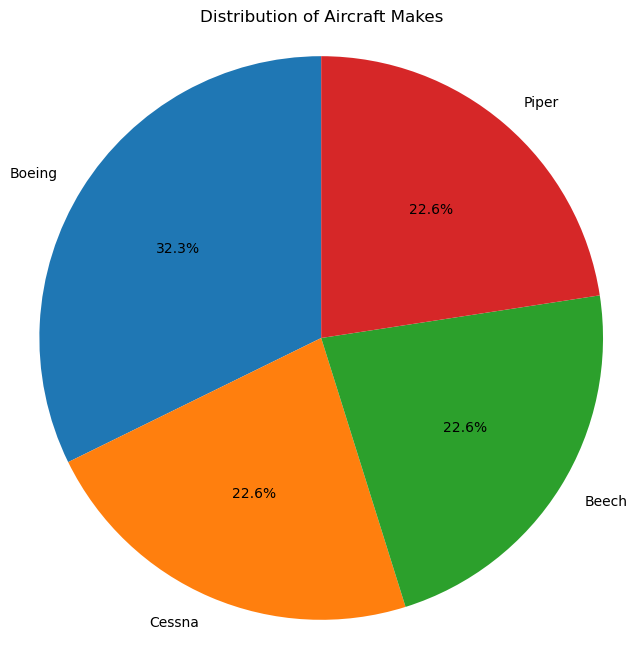

In [53]:
# Define the makes of interest
makes_of_interest = ['Boeing', 'Cessna', 'Piper', 'Beech']

# Filter the data for the specified makes
filtered_data = aviation_data[aviation_data['Make'].isin(makes_of_interest)]

# Count occurrences of each make
make_counts = filtered_data['Make'].value_counts()

# Display the make counts
make_counts

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Distribution of Aircraft Makes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

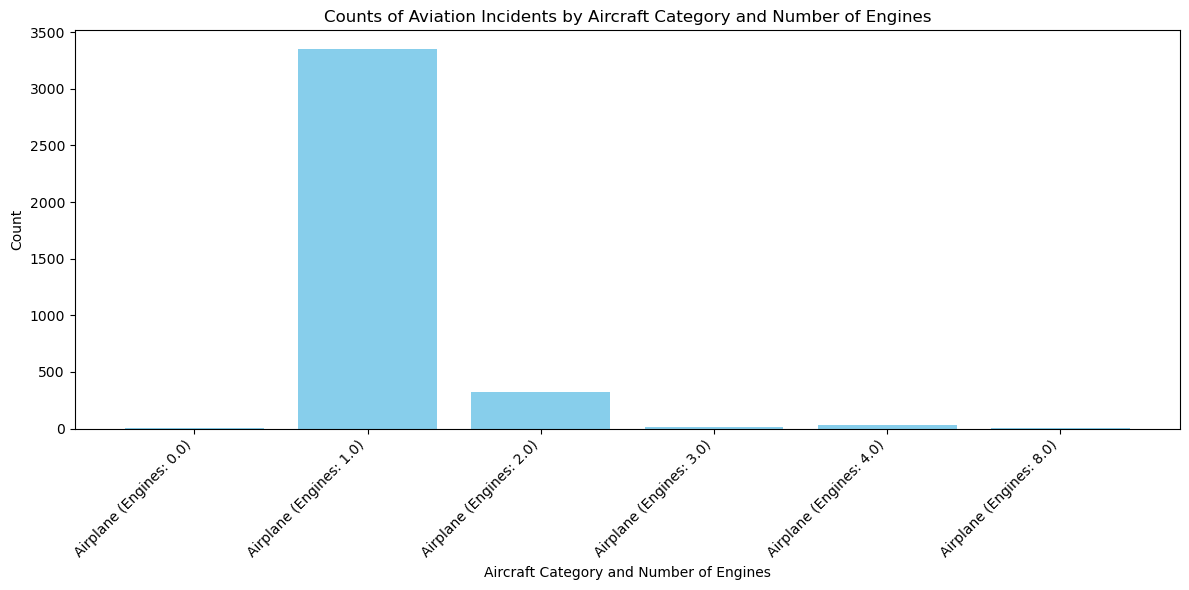

In [54]:
# Group by 'Aircraft.Category' and 'Number.of.Engines' and count occurrences
grouped_data = aviation_data.groupby(['Aircraft.Category', 'Number.of.Engines']).size().reset_index(name='Count')

#Create a bar plot
plt.figure(figsize=(12, 6))

# Combine Aircraft.Category and Number.of.Engines for better labeling
grouped_data['Label'] = grouped_data['Aircraft.Category'] + " (Engines: " + grouped_data['Number.of.Engines'].astype(str) + ")"

# Create the bar graph
plt.bar(grouped_data['Label'], grouped_data['Count'], color='skyblue')

# Formatting the plot
plt.title('Counts of Aviation Incidents by Aircraft Category and Number of Engines')
plt.xlabel('Aircraft Category and Number of Engines')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks for better readability
plt.tight_layout()
plt.show()

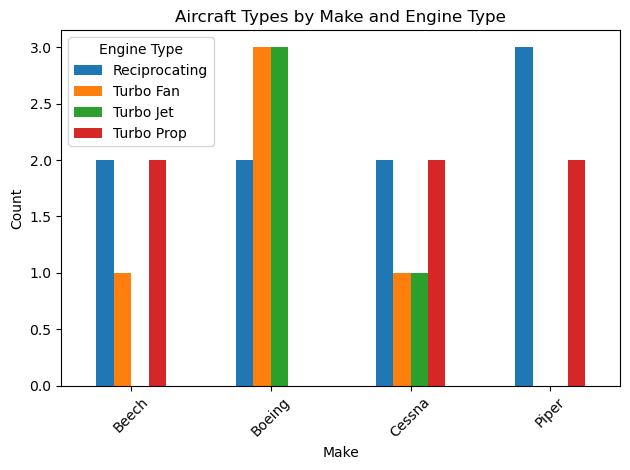

In [27]:
# Define the makes and engine types of interest
makes_of_interest = ['Boeing', 'Cessna', 'Piper', 'Beech']
engine_types_of_interest = ['Reciprocating', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet']

# Filter the dataset
filtered_data = aviation_data[(aviation_data['Make'].isin(makes_of_interest)) & 
                              (aviation_data['Engine.Type'].isin(engine_types_of_interest))]

# Count occurrences
count_data = filtered_data.groupby(['Make', 'Engine.Type']).size().unstack(fill_value=0)

# Plot the bar graph without stacking
count_data.plot(kind='bar', stacked=False)
plt.title('Aircraft Types by Make and Engine Type')
plt.xlabel('Make')
plt.ylabel('Count')
plt.legend(title='Engine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

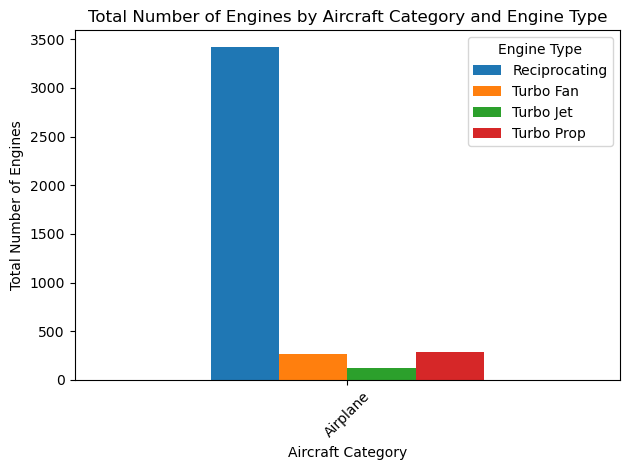

In [28]:
# Define the engine types of interest
engine_types_of_interest = ['Reciprocating', 'Turbo Prop', 'Turbo Fan', 'Turbo Jet']

# Filter the data for the specified engine types
filtered_data = aviation_data[aviation_data['Engine.Type'].isin(engine_types_of_interest)]

# Group by 'Aircraft.Category' and 'Engine.Type', summing the 'Number.of.Engines'
engine_counts = filtered_data.groupby(['Aircraft.Category', 'Engine.Type'])['Number.of.Engines'].sum()

# Reset the index to prepare for plotting
engine_counts = engine_counts.unstack(fill_value=0)

# Create a bar graph (non-stacked)
engine_counts.plot(kind='bar', stacked=False, color=plt.cm.tab10.colors)
plt.title('Total Number of Engines by Aircraft Category and Engine Type')
plt.xlabel('Aircraft Category')
plt.ylabel('Total Number of Engines')
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()

# Conclusions

The analysis of aviation incidents based on various parameters, including Aircraft.Category, Number.of.Engines, and Engine.Type, provides valuable insights into the trends and patterns within the dataset. The visualizations effectively highlight how different aircraft categories and engine types correlate with the frequency of incidents, enabling stakeholders to understand potential risk factors.

# Recommendations

- **Targeted Safety Initiatives:** Based on the findings, we recommend developing targeted safety initiatives focused on aircraft categories and engine types that exhibit higher incident rates. This could involve enhanced training for pilots and maintenance personnel specific to those aircraft.
- **Ongoing Monitoring:** Establish a continuous monitoring system to regularly analyze aviation incident data. This will help in identifying emerging trends and allow for timely interventions.
- **Data-Driven Decision Making:** Encourage aviation authorities and organizations to incorporate data analytics into their decision-making processes. This will facilitate more informed strategies for safety improvements and resource allocation.

# Limitations

- **Data Completeness:** The analysis is dependent on the completeness and accuracy of the dataset. Any missing or erroneous data could skew results and lead to misinterpretations.

- **External Factors:** The analysis does not account for external factors influencing aviation incidents, such as weather conditions, pilot experience, and maintenance practices. These factors could provide additional context to the findings.

- **Generalization:** The findings may not be universally applicable across all regions or types of aviation operations, as different regulatory environments and operational practices can affect incident rates.

# Next Steps

- **Further Research:** Conduct additional research to incorporate external factors that may influence incident rates. This could include qualitative studies or additional datasets that capture pilot and maintenance variables.

- **Expand Analysis:** Broaden the scope of analysis to include more variables such as geographical regions, operational contexts, and historical trends. This will enrich the understanding of aviation safety.

- **Stakeholder Engagement:** Engage with industry stakeholders, including regulatory bodies, airlines, and safety organizations, to disseminate findings and collaborate on safety initiatives informed by the data analysis.

